# **Multiple Linear Regression**

Multiple linear regression is an extension of simple linear regression. In this case, the goal is to find a linear equation that relates the dependent variable (Y) to multiple independent variables (X1, X2, X3, etc.), and to estimate the parameters of this equation.


**In this lab, we will use an advertising dataset to built a multiple linear regression model. Our task is to predict the sales based on the money spent on different platforms for marketing.**

***Import required libraries***

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

***Data Reading***

In [ ]:
c1 = "advertising.csv"

In [ ]:
# load the data into a pandas dataframe
df = pd.read_csv(c1)
df = pd.DataFrame(df)
print(df)


        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


***Data Inspection***

In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB



***Data Cleaning***

In [ ]:
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

***Separate feature and target column***

In [ ]:
X = df.drop('Sales', axis=1)
y = df['Sales']

***Split data into Train and test set***

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 41)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


***Build a multiple linear regression model***

In [ ]:
model = LinearRegression()

# fit the model to the training data
model.fit(x_train, y_train)


LinearRegression()

***Make prediction on test set***

In [ ]:
y_pred = model.predict(x_test)

***Visualize the predictions***

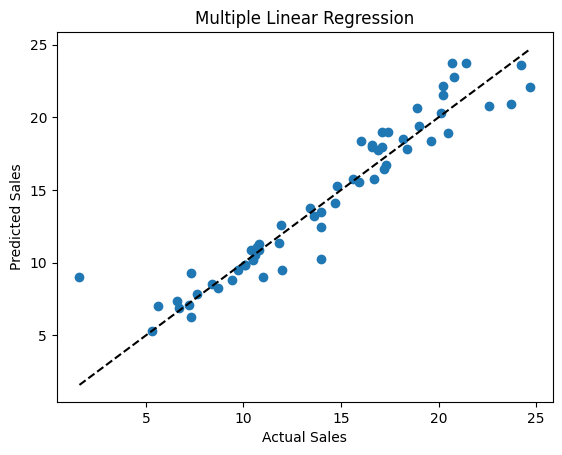

In [ ]:
# plot the actual and predicted values
plt.scatter(y_test, y_pred)

# add labels and title
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Multiple Linear Regression')

# add a diagonal line to show where predictions would be perfect
lims = [min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))]
plt.plot(lims, lims, 'k--')

# show the plot
plt.show()


This code will produce a scatter plot of the actual house prices versus the predicted house prices, with a diagonal line representing where predictions would be perfect. You can adjust the plot settings as per your requirements. Note that if you have multiple features, you can plot the predicted values against each feature separately to get a better understanding of how the model is making predictions.

***Looking at the RMSE***

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.6374712558306828

***Checking the R-squared on the test set***

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9054054812765681